In [17]:
import pandas as pd

In [19]:
#Load main dataset
df_airline = pd.read_excel("airfare_CT3-1.xlsx")

#Load distance dataset
df_distance = pd.read_csv("air_distance.csv")

In [20]:
display(df_airline.head())
display(df_distance.head())

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


,Unnamed: 0,Source,Dest,Distance(Km)
0,0,BLR,DEL,1709.71
1,1,CCU,IXR,327.84
2,2,IXR,BBI,344.54
3,3,BBI,BLR,1166.17
4,4,DEL,LKO,423.41


In [21]:
display(df_airline.shape)
display(df_distance.shape)

(9000, 11)

(126, 4)

In [22]:
df_airline.columns

Index(['Airline', 'Date', 'Departure Station', 'Arrival Station', 'Route Map',
       'Departure Time', 'Arrival Time', 'Journey Time', 'Stops', 'Extra Info',
       'Price'],
      dtype='object')

In [23]:
df_airline.dtypes

Airline              object
Date                 object
Departure Station    object
Arrival Station      object
Route Map            object
Departure Time       object
Arrival Time         object
Journey Time         object
Stops                object
Extra Info           object
Price                 int64
dtype: object

In [26]:
#Clean & Standardize columns
city_map = {
    "Chennai": "MAA", 'Delhi': 'DEL', 'New Delhi': 'DEL',
    'Kolkata': 'CCU', 'Mumbai': 'BOM',
    'Cochin': 'COK', 'Hyderabad': 'HYD', "Banglore": "BLR"
}

df_airline["Arrival Station"] = df_airline["Arrival Station"].replace(city_map)
df_airline["Departure Station"] = df_airline["Departure Station"].replace(city_map)

#Quick check
df_airline.head()

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,BLR,DEL,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,CCU,BLR,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,DEL,COK,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,CCU,BLR,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,BLR,DEL,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [29]:
#Clean Extra Info column
df_airline["Extra Info"] = df_airline["Extra Info"].replace({"No Info": "No Info"})

info_map = {
    'No Info': 0,
    'In-flight meal not included': 1,
    'No check-in baggage included': 2,
    '1 Long layover': 3,
    'Change airports': 4,
    'Business class': 5,
    '1 Short layover': 6,
    'Red-eye flight': 7
}

df_airline["Extra Info"] = df_airline["Extra Info"].map(info_map)

In [33]:
df_airline["Extra Info"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8995    NaN
8996    NaN
8997    1.0
8998    NaN
8999    NaN
Name: Extra Info, Length: 9000, dtype: float64

In [35]:
#Encode Stops column
df_airline["Stops"] = df_airline["Stops"].replace({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3
})

#Quick check
df_airline["Stops"]

/var/folders/9_/jzbpn_d578l55nyn4xxfy3f80000gn/T/ipykernel_1328/702681330.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_airline["Stops"] = df_airline["Stops"].replace({


0       0
1       2
2       2
3       1
4       1
       ..
8995    1
8996    0
8997    0
8998    2
8999    0
Name: Stops, Length: 9000, dtype: int64

In [37]:
#Extract Day & Month from Date 
df_airline[["Day", "Month", "Year"]] = df_airline["Date"].str.split("/", expand=True)

#Converting str into int
df_airline["Day"] = df_airline["Day"].astype(int)
df_airline["Month"] = df_airline["Month"].astype(int)

#Quick look
display(df_airline["Day"])
display(df_airline["Month"])

0       24
1        1
2        9
3       12
4        1
        ..
8995    27
8996    12
8997    15
8998     9
8999     1
Name: Day, Length: 9000, dtype: int64

0       3
1       5
2       6
3       5
4       3
       ..
8995    3
8996    5
8997    3
8998    5
8999    3
Name: Month, Length: 9000, dtype: int64

In [39]:
display(df_airline.head())

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,BLR,DEL,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,NaN,3897,24,3,2019
1,Air India,1/05/2019,CCU,BLR,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,NaN,7662,1,5,2019
2,Jet Airways,9/06/2019,DEL,COK,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,NaN,13882,9,6,2019
3,IndiGo,12/05/2019,CCU,BLR,CCU → NAG → BLR,18:05,23:30,5h 25m,1,NaN,6218,12,5,2019
4,IndiGo,01/03/2019,BLR,DEL,BLR → NAG → DEL,16:50,21:35,4h 45m,1,NaN,13302,1,3,2019


In [41]:
df_airline['Journey Time'].isnull().sum()

0

In [43]:
def parse_duration(value):
    try:
        value = str(value).lower().strip()
        if 'h' not in value:
            value = '0h ' + value
        if 'm' not in value:
            value = value + ' 0m'
        value = value.replace('h', 'h ').replace('m', 'm ')
        value = value.replace('h ', ':').replace('m', '')
        parts = value.split(':')
        hr = int(parts[0]) if parts[0].isdigit() else 0
        min_ = int(parts[1]) if len(parts) > 1 and parts[1].isdigit() else 0
        return hr * 60 + min_
    except:
        return 0

df_airline['Duration Total'] = df_airline['Journey Time'].apply(parse_duration)

In [45]:
df_airline.head()

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price,Day,Month,Year,Duration Total
0,IndiGo,24/03/2019,BLR,DEL,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,NaN,3897,24,3,2019,120
1,Air India,1/05/2019,CCU,BLR,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,NaN,7662,1,5,2019,420
2,Jet Airways,9/06/2019,DEL,COK,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,NaN,13882,9,6,2019,1140
3,IndiGo,12/05/2019,CCU,BLR,CCU → NAG → BLR,18:05,23:30,5h 25m,1,NaN,6218,12,5,2019,300
4,IndiGo,01/03/2019,BLR,DEL,BLR → NAG → DEL,16:50,21:35,4h 45m,1,NaN,13302,1,3,2019,240


In [47]:
#Calculate Route Distance from Route Map
display(df_distance)

,Unnamed: 0,Source,Dest,Distance(Km)
0,0,BLR,DEL,1709.71
1,1,CCU,IXR,327.84
2,2,IXR,BBI,344.54
3,3,BBI,BLR,1166.17
4,4,DEL,LKO,423.41
...,...,...,...,...
121,121,VTZ,HYD,511.31
122,122,BLR,STV,1026.37
123,123,STV,DEL,936.58
124,124,IXB,DEL,1126.20


In [49]:
distance_map = {}

for _, row in df_distance.iterrows():
    key = (row["Source"], row["Dest"])
    distance_map[key] = row["Distance(Km)"]

#Quick check
distance_map

{('BLR', 'DEL'): 1709.71,
 ('CCU', 'IXR'): 327.84,
 ('IXR', 'BBI'): 344.54,
 ('BBI', 'BLR'): 1166.17,
 ('DEL', 'LKO'): 423.41,
 ('LKO', 'BOM'): 1183.56,
 ('BOM', 'COK'): 1064.36,
 ('CCU', 'NAG'): 985.16,
 ('NAG', 'BLR'): 889.55,
 ('NAG', 'DEL'): 853.49,
 ('CCU', 'BLR'): 1547.27,
 ('BLR', 'BOM'): 834.63,
 ('BOM', 'DEL'): 1137.24,
 ('BLR', 'COK'): 367.38,
 ('MAA', 'CCU'): 1387.26,
 ('CCU', 'BOM'): 1665.73,
 ('DEL', 'AMD'): 755.49,
 ('AMD', 'BOM'): 444.1,
 ('DEL', 'PNQ'): 1155.94,
 ('PNQ', 'COK'): 974.84,
 ('DEL', 'CCU'): 1312.96,
 ('COK', 'DEL'): 2048.6,
 ('DEL', 'IDR'): 662.01,
 ('IDR', 'BOM'): 505.97,
 ('LKO', 'COK'): 1906.52,
 ('CCU', 'GAU'): 498.44,
 ('GAU', 'DEL'): 1456.73,
 ('NAG', 'BOM'): 682.82,
 ('MAA', 'BLR'): 267.36,
 ('DEL', 'HYD'): 1267.53,
 ('HYD', 'COK'): 817.18,
 ('CCU', 'HYD'): 1207.74,
 ('HYD', 'BLR'): 455.14,
 ('DEL', 'MAA'): 1761.53,
 ('MAA', 'COK'): 516.8,
 ('BOM', 'HYD'): 623.54,
 ('DEL', 'BHO'): 586.78,
 ('BHO', 'BOM'): 657.81,
 ('DEL', 'JAI'): 229.75,
 ('JAI', 'BO

In [51]:
#Distance Calculator func

def get_total_distance(route_str):
    try:
        stops = [x.strip() for x in route_str.split("→")]
        total = 0
        for i in range(len(stops) - 1):
            leg = (stops[i], stops[i+1])
            reverse_leg = (stops[i+1], stops[i])
            dist = distance_map.get(leg) or distance_map.get(reverse_leg)
            if dist:
                total += dist

        return total
    except:
        return 0
        

In [53]:
#Apply the func to get total distance
df_airline["Total Distance"] = df_airline["Route Map"].apply(get_total_distance)

#Quick look
display(df_airline.head())

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price,Day,Month,Year,Duration Total,Total Distance
0,IndiGo,24/03/2019,BLR,DEL,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,NaN,3897,24,3,2019,120,1709.71
1,Air India,1/05/2019,CCU,BLR,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,NaN,7662,1,5,2019,420,1838.55
2,Jet Airways,9/06/2019,DEL,COK,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,NaN,13882,9,6,2019,1140,2671.33
3,IndiGo,12/05/2019,CCU,BLR,CCU → NAG → BLR,18:05,23:30,5h 25m,1,NaN,6218,12,5,2019,300,1874.71
4,IndiGo,01/03/2019,BLR,DEL,BLR → NAG → DEL,16:50,21:35,4h 45m,1,NaN,13302,1,3,2019,240,1743.04


In [55]:
#Add Total distance next to Route Map
cols = list(df_airline.columns)

cols.remove("Total Distance") #removes Total_Distance from its current position to avoid duplpicate

route_index = cols.index("Route Map") #find index of Route Map

cols.insert(route_index+1, "Total Distance") # adding Total_Distance next to Route_Map index

df_airline = df_airline[cols]

#Quick check
display(df_airline.head())

,Airline,Date,Departure Station,Arrival Station,Route Map,Total Distance,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price,Day,Month,Year,Duration Total
0,IndiGo,24/03/2019,BLR,DEL,BLR → DEL,1709.71,22:20,01:10 22 Mar,2h 50m,0,NaN,3897,24,3,2019,120
1,Air India,1/05/2019,CCU,BLR,CCU → IXR → BBI → BLR,1838.55,05:50,13:15,7h 25m,2,NaN,7662,1,5,2019,420
2,Jet Airways,9/06/2019,DEL,COK,DEL → LKO → BOM → COK,2671.33,09:25,04:25 10 Jun,19h,2,NaN,13882,9,6,2019,1140
3,IndiGo,12/05/2019,CCU,BLR,CCU → NAG → BLR,1874.71,18:05,23:30,5h 25m,1,NaN,6218,12,5,2019,300
4,IndiGo,01/03/2019,BLR,DEL,BLR → NAG → DEL,1743.04,16:50,21:35,4h 45m,1,NaN,13302,1,3,2019,240


In [56]:
#Final Dataset Preparation

In [59]:
#Rename Columns for Consistency

df_airline = df_airline.rename(columns={
    'Departure Station': 'Source',
    'Arrival Station': 'Destination',
    'Extra Info': 'Info'
})

In [61]:
#Select relevant features
df_final = df_airline[[
    'Airline', 'Source', 'Destination', 'Stops', 'Info',
    'Day', 'Month', 'Total Distance', 'Duration Total', 'Price'
]]

In [63]:
#Save csv
df_final.to_csv("final_airfare.csv", index=False)

In [65]:
df_final.head()

,Airline,Source,Destination,Stops,Info,Day,Month,Total Distance,Duration Total,Price
0,IndiGo,BLR,DEL,0,NaN,24,3,1709.71,120,3897
1,Air India,CCU,BLR,2,NaN,1,5,1838.55,420,7662
2,Jet Airways,DEL,COK,2,NaN,9,6,2671.33,1140,13882
3,IndiGo,CCU,BLR,1,NaN,12,5,1874.71,300,6218
4,IndiGo,BLR,DEL,1,NaN,1,3,1743.04,240,13302


In [67]:
df_final["price_per_km"] = df_final["Price"] / df_final["Total Distance"]
df_final["is_short_haul"] = (df_final["Total Distance"] < 1000).astype(int)

#Quick Look
df_final.head()

/var/folders/9_/jzbpn_d578l55nyn4xxfy3f80000gn/T/ipykernel_1328/223886176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["price_per_km"] = df_final["Price"] / df_final["Total Distance"]
/var/folders/9_/jzbpn_d578l55nyn4xxfy3f80000gn/T/ipykernel_1328/223886176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["is_short_haul"] = (df_final["Total Distance"] < 1000).astype(int)


,Airline,Source,Destination,Stops,Info,Day,Month,Total Distance,Duration Total,Price,price_per_km,is_short_haul
0,IndiGo,BLR,DEL,0,NaN,24,3,1709.71,120,3897,2.279334,0
1,Air India,CCU,BLR,2,NaN,1,5,1838.55,420,7662,4.167415,0
2,Jet Airways,DEL,COK,2,NaN,9,6,2671.33,1140,13882,5.196662,0
3,IndiGo,CCU,BLR,1,NaN,12,5,1874.71,300,6218,3.316780,0
4,IndiGo,BLR,DEL,1,NaN,1,3,1743.04,240,13302,7.631494,0


In [69]:
#Encoding & Scaling
#Encoding Categorical Features

In [71]:
df_final.dtypes

Airline            object
Source             object
Destination        object
Stops               int64
Info              float64
Day                 int64
Month               int64
Total Distance    float64
Duration Total      int64
Price               int64
price_per_km      float64
is_short_haul       int64
dtype: object

In [73]:
df_encoded = pd.get_dummies(df_final, columns=["Airline", "Source", "Destination"], drop_first=True)

In [75]:
df_encoded.head()

,Stops,Info,Day,Month,Total Distance,Duration Total,Price,price_per_km,is_short_haul,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_BOM,Source_CCU,Source_DEL,Source_MAA,Destination_CCU,Destination_COK,Destination_DEL,Destination_HYD
0,0,NaN,24,3,1709.71,120,3897,2.279334,0,False,...,False,False,False,False,False,False,False,False,True,False
1,2,NaN,1,5,1838.55,420,7662,4.167415,0,True,...,False,False,False,True,False,False,False,False,False,False
2,2,NaN,9,6,2671.33,1140,13882,5.196662,0,False,...,False,False,False,False,True,False,False,True,False,False
3,1,NaN,12,5,1874.71,300,6218,3.316780,0,False,...,False,False,False,True,False,False,False,False,False,False
4,1,NaN,1,3,1743.04,240,13302,7.631494,0,False,...,False,False,False,False,False,False,False,False,True,False


In [95]:
#Scaling Numeric Features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ["Stops", "Info", "Day", "Month", "Total Distance", "Duration Total"]

df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

#Quick check
df_encoded.head()

,Stops,Info,Day,Month,Total Distance,Duration Total,Price,price_per_km,is_short_haul,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_BOM,Source_CCU,Source_DEL,Source_MAA,Destination_CCU,Destination_COK,Destination_DEL,Destination_HYD
0,0.000000,NaN,0.884615,0.000000,0.303221,0.042553,3897,2.279334,0,False,...,False,False,False,False,False,False,False,False,True,False
1,0.666667,NaN,0.000000,0.666667,0.339188,0.148936,7662,4.167415,0,True,...,False,False,False,True,False,False,False,False,False,False
2,0.666667,NaN,0.307692,1.000000,0.571671,0.404255,13882,5.196662,0,False,...,False,False,False,False,True,False,False,True,False,False
3,0.333333,NaN,0.423077,0.666667,0.349283,0.106383,6218,3.316780,0,False,...,False,False,False,True,False,False,False,False,False,False
4,0.333333,NaN,0.000000,0.000000,0.312525,0.085106,13302,7.631494,0,False,...,False,False,False,False,False,False,False,False,True,False


## **Model Building & Evaluation**

In [100]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X = df_encoded.drop("Price", axis=1)
y = df_encoded["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
#Drop Rows with NaNs (Quick Fix)
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

In [104]:
#Fill Missing Values (Better for Modeling)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [106]:
#Train a Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [108]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 Score: {r2:.4f}")
print(f"Mae: {mae:.2f}")
print(f"Mse: {mse: 2f}")

R2 Score: -1478967423027683786752.0000
Mae: 21222542138818.98
Mse:  165740760118739.281250


In [110]:
#Try Decision Tree & Random Forest & XGBoost

In [112]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_tree_pred = tree_model.predict(X_test)

In [114]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
y_forest_pred = forest_model.predict(X_test)

In [116]:
#Compare Performance
def evaluate(y_true, y_pred, label):
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    import numpy as np
    print(f"\n📈 {label}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"MAE: ₹{mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: ₹{np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")

evaluate(y_test, y_pred, "Linear Regression")
evaluate(y_test, y_tree_pred, "Decision Tree")
evaluate(y_test, y_forest_pred, "Random Forest")



📈 Linear Regression
R² Score: -1478967423027683786752.0000
MAE: ₹21222542138818.98
RMSE: ₹165740760118739.28

📈 Decision Tree
R² Score: 0.9101
MAE: ₹546.00
RMSE: ₹1292.07

📈 Random Forest
R² Score: 0.9327
MAE: ₹431.75
RMSE: ₹1118.18


In [118]:
#Due to SimpleImputer, data returned as array. so fixing it by tranforming into DF
X_train_df = pd.DataFrame(X_train, columns=X.columns)

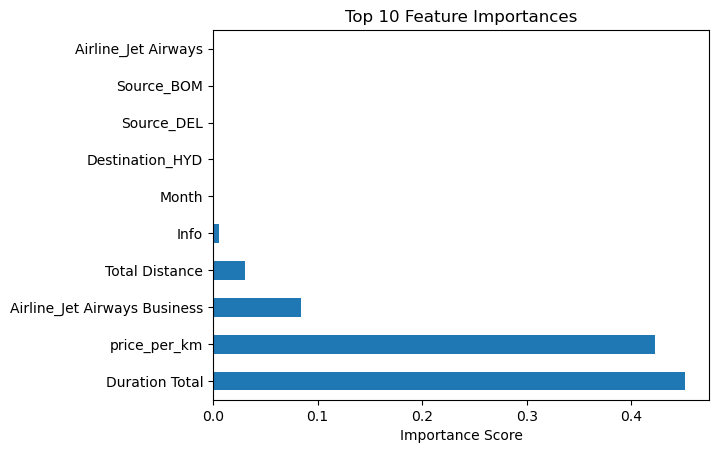

In [120]:
#Random Forest
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = pd.Series(forest_model.feature_importances_, index=X_train_df.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()

In [122]:
#Train XGBoost Regressor
!pip install xgboost


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [124]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
y_xgb_pred = xgb_model.predict(X_test)

In [126]:
evaluate(y_test, y_xgb_pred, "XGBoost Regressor")


📈 XGBoost Regressor
R² Score: 0.9449
MAE: ₹392.46
RMSE: ₹1012.05


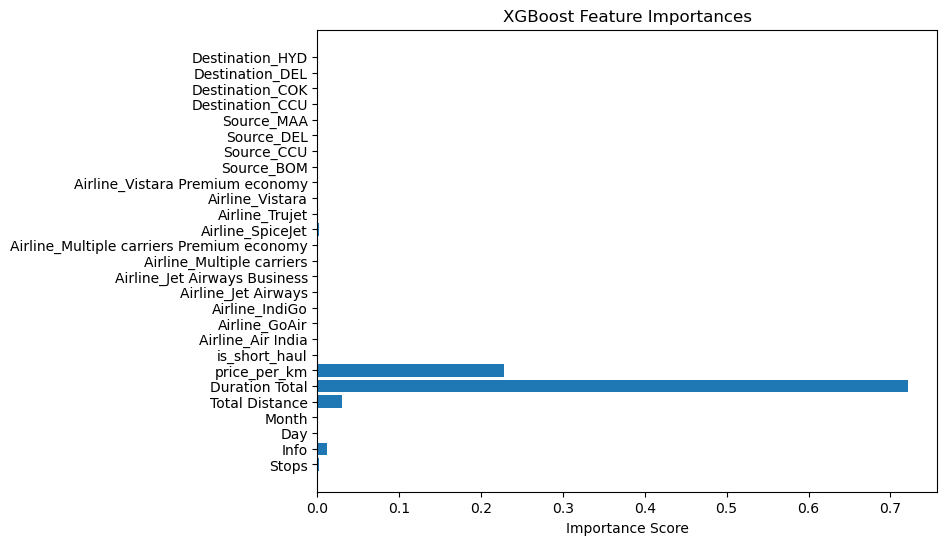

In [128]:
import matplotlib.pyplot as plt

xgb_model.feature_importances_  # array of importances

plt.figure(figsize=(8, 6))
plt.barh(X_train_df.columns, xgb_model.feature_importances_)
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance Score")
plt.show()

In [132]:
X = df_encoded.drop('Price', axis=1)  # or whatever your target column was

In [134]:
feature_list = X.columns.tolist()

In [136]:
import joblib
joblib.dump(feature_list, 'feature_list.pkl')

['feature_list.pkl']

In [138]:
feature_list = joblib.load('feature_list.pkl')

In [140]:
input_vector = [sample_input.get(col, 0) for col in feature_list]

In [142]:
def test_model(sample_input, model, feature_list):
    input_vector = [sample_input.get(col, 0) for col in feature_list]
    prediction = model.predict([input_vector])[0]
    return max(0, int(prediction))

In [144]:
test_model(sample_input, model, feature_list)

0